# 1. 강의영상 

# 2. Imports

In [92]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.preprocessing 

# 3. 자료

`-` 아래와 같은 자료를 상상하자. 

In [557]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_manyp.csv")
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,gpa490,gpa491,gpa492,gpa493,gpa494,gpa495,gpa496,gpa497,gpa498,gpa499
0,-0.949314,0.051535,135,134.905876,135.117032,135.023627,134.944710,134.984846,134.807689,135.020455,...,0.051346,0.051504,0.051523,0.051157,0.051068,0.051685,0.050885,0.051464,0.051650,0.051265
1,4.861725,0.355496,935,934.929100,935.109071,934.979972,934.868964,935.010303,935.186503,935.031157,...,0.354803,0.355750,0.355235,0.355323,0.355300,0.355997,0.354530,0.355399,0.354786,0.355334
2,5.582663,2.228435,485,485.109978,485.172261,484.914730,485.199464,485.203148,485.230656,484.968253,...,2.227715,2.227660,2.228437,2.227558,2.229366,2.228802,2.228404,2.228835,2.228413,2.228089
3,3.919694,1.179701,65,65.065723,64.898906,65.001654,64.944563,64.970271,64.936909,64.931008,...,1.180655,1.179778,1.179367,1.179450,1.179640,1.179726,1.179271,1.180289,1.179608,1.180105
4,8.286851,3.962356,445,444.872193,445.210402,444.836561,445.049579,444.984418,445.092224,444.970579,...,3.961363,3.962405,3.962808,3.963065,3.962240,3.962235,3.962224,3.961903,3.962439,3.961984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.002081,4.288465,280,280.049160,280.052529,279.991289,280.007350,279.863523,280.189550,279.958847,...,4.287565,4.288881,4.288837,4.289672,4.288370,4.287814,4.287992,4.287714,4.288704,4.288345
496,5.431050,2.601212,310,310.126755,310.109030,310.142602,309.908826,309.889006,310.057635,309.901828,...,2.600949,2.601434,2.601542,2.601368,2.601054,2.600849,2.601370,2.601560,2.601465,2.599992
497,0.088812,0.042323,225,225.050793,224.924632,225.050396,224.936541,224.894175,225.050287,225.164853,...,0.042784,0.042363,0.042912,0.041777,0.041627,0.042512,0.042958,0.042793,0.043258,0.042007
498,3.806388,1.041416,320,320.184743,320.041968,319.946223,320.018932,320.128054,320.032726,320.061105,...,1.041218,1.040949,1.040485,1.041649,1.041252,1.041815,1.041692,1.041806,1.040690,1.041343


In [755]:
df = df.iloc[:,:3]

gpa = np.array(df.gpa)
toeic = np.array(df.toeic) 

n_features = 500
gpa_many = gpa.reshape(-1,1) + np.random.randn(500,n_features)*10/200
toeic_many = toeic.reshape(-1,1) + np.random.randn(500,n_features)*10.0
gpa_many = pd.DataFrame(gpa_many,columns=[f'gpa{i}' for i in range(n_features)])
toeic_many = pd.DataFrame(toeic_many,columns=[f'toeic{i}' for i in range(n_features)])
#new_feature = toeic_many * 1/200 + gpa_many*1.3 + np.random.randn(500,n_features)*0.1*1/200
df = pd.concat([df,toeic_many,gpa_many],axis=1)

- toeic0,toeic1,... 등은 토익과 유사한 새로운 시험들을 의미함. (실제 점수는 정수이겠지만 편의상 소수점으로 사용하였음)
- employmet_score는 회사에 내부적으로 정의된 채점기준표이며, 이 기준표에 의하여 일정점수 이상인 사람은 합격하고, 그렇지 않은 사람은 불합격한다고 가정함. 


`-` 비밀: 사실 저는 데이터를 아래의 공식에 따라서 만들었어요..

```
employment_score = toeic*1/200 + gpa*1.3 + random 
````

# 4. 잘못된 분석 

In [757]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

In [758]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [759]:
predictr = sklearn.linear_model.LinearRegression()

In [760]:
predictr.fit(X,y)

LinearRegression()

In [761]:
#predictr.coef_,predictr.intercept_

- 실제계수값은 `토익*0.005`, `GPA*1.3` 인데.. GPA는 얼추맞는거 같지만, 토익은 딱봐도 틀려보임..

In [762]:
predictr.score(X,y) 

1.0

In [763]:
predictr.score(XX,yy)

0.3933528973907312

# 5. 제대로 분석했다면? 

## A. `toeic`과 `gpa`가 유의미한 변수라는걸 눈치챘다면? 

In [764]:
X = df_train[['toeic','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic','gpa']]
yy = df_test[['employment_score']]

In [765]:
predictr = sklearn.linear_model.LinearRegression()

In [766]:
predictr.fit(X,y)

LinearRegression()

In [767]:
predictr.coef_,predictr.intercept_

(array([[0.0053471 , 1.29761661]]), array([-0.14053701]))

In [768]:
predictr.score(X,y)

0.8170294319254924

In [769]:
predictr.score(XX,yy)

0.8587645309114827

## B. 하다못해 `toeic0`과 `gpa`로 적합했다면? 

In [943]:
X = df_train[['toeic0','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic0','gpa']]
yy = df_test[['employment_score']]

In [944]:
predictr = sklearn.linear_model.LinearRegression()

In [945]:
predictr.fit(X,y)

LinearRegression()

In [946]:
predictr.coef_,predictr.intercept_

(array([[0.00536664, 1.33515615]]), array([-0.25090603]))

In [947]:
predictr.score(X,y)

0.8317949508474549

In [948]:
predictr.score(XX,yy)

0.8271424176752014

# 6. 왜 이런 일이 생기는가?

`-` 잘못된 분석을 다시 재현해보자. 

In [949]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=12)

In [950]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [951]:
predictr = sklearn.linear_model.LinearRegression()

In [952]:
predictr.fit(X,y)

LinearRegression()

`-` 계수를 해석해보자.

In [953]:
s = pd.Series(predictr.coef_.reshape(-1))
s.index = X.columns
s

gpa       0.002488
toeic     0.000577
toeic0    0.009181
toeic1    0.003893
toeic2   -0.003090
            ...   
gpa495    0.002374
gpa496    0.002421
gpa497    0.002473
gpa498    0.002362
gpa499    0.002701
Length: 1002, dtype: float64

In [954]:
s['toeic0':'toeic499'].sum() + s['toeic']

0.005748850935728758

In [955]:
s['gpa0':'gpa499'].sum() + s['gpa']

1.2443534513189458

`-` 반복해보자. 

In [956]:
import matplotlib.pyplot as plt

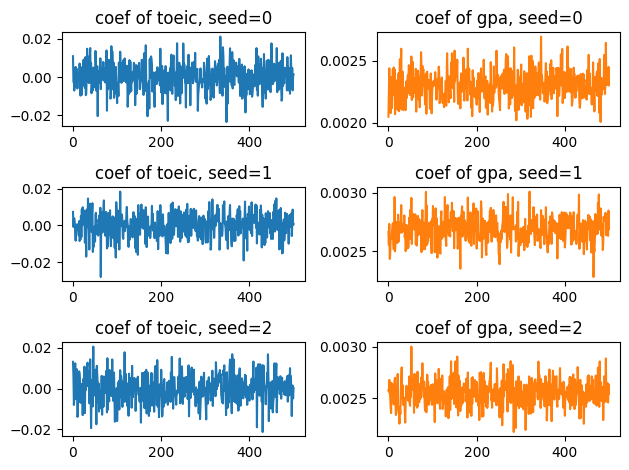

In [983]:
fig, ax = plt.subplots(3,2)
for i in range(3):
    df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=i)
    X = df_train.drop(['employment_score'],axis=1)
    y = df_train[['employment_score']]
    XX = df_test.drop(['employment_score'],axis=1)
    yy = df_test[['employment_score']]
    predictr = sklearn.linear_model.LinearRegression()
    predictr.fit(X,y)
    s = pd.Series(predictr.coef_.reshape(-1))
    s.index = X.columns
    ax[i,0].plot(s['toeic0':'toeic499'].tolist() + s[['toeic']].tolist(),color='C0')
    ax[i,0].set_title('coef of toeic, seed={}'.format(i))
    ax[i,1].plot(s['gpa0':'gpa499'].tolist() + s[['gpa']].tolist(),color='C1') 
    ax[i,1].set_title('coef of gpa, seed={}'.format(i))    
fig.tight_layout()

# 7. Discussions

`-` 어렴풋한 감각: 쓸모없는 변수가 많이 있으면 오히려 모형의 적합도가 떨어진다. (규칙을 찾으면 안될것에서 규칙을 찾고있으니까 잘 될리가 없지)

`-` 쓸모없는 변수란 느낌이 드는 경우?

- 경우1: 진짜 쓸모 없는거.. (X1= 부먹/찍먹, X2= 민초/민초X) $\to$ 애초에 `X1`,`X2`을 보고 `y`를 맞출 생각이 들지 않어.. 
- 경우2: 실제론 쓸모 있는데, 대체자가 있는 경우. (X1= toeic, X2= 유사toeic) $\to$ `X1` 을 보고 `y`를 맞출 것 같은 생각이 들어, 그리고 `X2`를 보고 `y`를 맞출 것 같은 생각도 들어. 그런데 `X1`이랑 `X2`는 너무 비슷해

`-` 경우1, 경우2 모두 과대적합(overfitting)을 야기한다. 그리고 경우2와 같은 상황에서 발생하는 문제를 특별히 다중공선성이라고 칭한다. 


`-` 다중공선성이 발생했을 경우 나타나는 특징

1. 계수들의 추정값이 불안정하다^[사실 `toeic의 계수 + toeic0의 계수 + ... + toeic499의 계수` $\approx$ `0.05` 이거나 `gpa의 계수 + gpa0의 계수 + ... + gpa499의 계수` $\approx$ `1.3` 이면 거진 올바른 추정이라 볼 수 있음. 즉 애초에 답이 여러개라서 계수값의 추정이 불안정한 것]
2. 과대적합 문제를 불러올 수 있음 
3. 계수의 해석이 어려움

`-` 의문: 그래서 해결방법은? 변수를 잘 보고 제거하라고??

# 첫번째 해법 Ridge

In [776]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 데이터와 모델 준비
# X, y = your_data, your_target
# model = RandomForestClassifier()

# KFold 객체 생성 (K=5인 경우)
kfold = KFold(n_splits=2)

# # 교차 검증 수행 및 평가
# results = cross_val_score(model, X, y, cv=kfold)
# print("교차 검증 결과: ", results)
# print("평균 정확도: ", results.mean())


In [830]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [852]:
model = sklearn.linear_model.Lasso(alpha=1)

In [853]:
model.fit(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.488e+02, tolerance: 1.988e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [854]:
model.score(X,y)

0.747471111027534

In [855]:
model.score(XX,yy)

0.672263964235474

In [748]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=2)

In [749]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

In [750]:
model.fit(X,y)
model.score(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.596e+01, tolerance: 2.001e-01
  model = cd_fast.enet_coordinate_descent(


0.829774840307156

In [751]:
model.score(XX,yy)

0.8247680830688733

In [575]:
cross_val_score(predictr,X,y,cv=kfold)

array([0.71611975, 0.72320271])

In [581]:
predictr.fit(X[175:],y[175:])
predictr.score(X[:175],y[:175])

0.7161197516929763

In [582]:
predictr.fit(X[:175],y[:175])
predictr.score(X[175:],y[175:])

0.7232027103938079

# 7. Ridge, RidgeCV

# 8. Lasso, LassoCV

In [583]:
sklearn.linear_model.LassoCV??

Init signature:
sklearn.linear_model.LassoCV(
    *,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Source:        
class LassoCV(RegressorMixin, LinearModelCV):
    """Lasso linear model with iterative fitting along a regularization path.

    See glossary entry for :term:`cross-validation estimator`.

    The best model is selected by cross-validation.

    The optimization objective for Lasso is::

        (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

    Read more in the :ref:`User Guide <lasso>`.

    Parameters
    ----------
    eps : float, default=1e-3
        Length of the path. ``eps=1e-3`` means that
        ``alpha_min / alpha_max = 1e-3``.

    n_alphas : int, default=100
        Number of alphas along the regularization path.

    alphas : arr